## Coffee Quality Prediction 

### Introduction



This notebook presents the prediction of the quality of wine on the basis of various features such as the farm and beans metadata, or quality measures (flavor, aroma, etc.). This prospection is carried out with Python for data analysis, visualization and machine learning (ML).

**Dataset**

<u>URL:</u> https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi/

This dataset is available for Arabica and Robusta coffees on Kaggle, coming from Coffee Quality Institute (CQI) in January, 2018. It consists of three CSV files:
 - *arabica_data_cleaned.csv*: species, owner, farm_name, variety, flavor, moisture, color, etc.
 - *robusta_data_cleaned.csv*: species, owner, farm_name, variety, flavor, moisture, color, etc.

**Roadmap**
1. Data analysis
2. Machine Learning

**Tools**
- Python: 
    - pandas: data processing
    - seaborn: Data visualization
    - scikit-learn: machine learning

### Initialization 

First, let's import the Python libraries and load dataset in a unique Pandas DataFrame <code>df</code> by merging both *arabica_data_cleaned.csv* and *robusta_data_cleaned.csv* files.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np

# Seaborn scaling
sns.set(font_scale=1.25)

In [2]:
df_arabica = pd.read_csv('dataset/arabica_data_cleaned.csv')
df_arabica.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
df_arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [4]:
df_robusta = pd.read_csv('dataset/robusta_data_cleaned.csv')
df_robusta.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
1,2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
2,3,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0000,sethuraman estate,1000m,...,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
3,4,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
4,5,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0


In [5]:
df_robusta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

In [6]:
print('Columns only in Arabica DataFrame:',set(df_arabica.columns)-set(df_robusta.columns))
print('Columns only in Robusta DataFrame:',set(df_robusta.columns)-set(df_arabica.columns))

Columns only in Arabica DataFrame: {'Aroma', 'Sweetness', 'Uniformity', 'Acidity', 'Body'}
Columns only in Robusta DataFrame: {'Uniform.Cup', 'Fragrance...Aroma', 'Salt...Acid', 'Mouthfeel', 'Bitter...Sweet'}


In short, <code>df_arabica</code> has a 1311 rows x 44 columns shape, while <code>df_robusta</code> has a 28 rows x 44 columns shape. Such imbalanced situation is of prior importance for future ML processes.

Also, one may observe that both DataFrame possess 5 unique columns. In reality, columns are equivalents and should be just renamed before concatenation.

In [7]:
df_robusta.rename(columns={'Uniform.Cup': 'Uniformity',
                           'Fragrance...Aroma': 'Aroma',
                           'Mouthfeel': 'Body',
                           'Salt...Acid': 'Acidity',
                           'Bitter...Sweet': 'Sweetness'}, inplace=True)

In [8]:
df = pd.concat([df_arabica, df_robusta], join='outer').reset_index(drop=True)
df.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


### Exploratory Data Analysis

One inspects data stored in the <code>df</code> DataFrame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [10]:
df.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                159
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

Briefly, <code>df</code> has a 1339 rows x 48 columns shape, and contains both numerical and categorical data with null values (1063 maximum for the <code>Lot.Number</code> column). Among the 48 columns, categorical data are found in 24 columns, the others being for numerical data subdivided in <code>float64</code> and <code>int64</code> types in 21 and 4 columns, respectively.

One may also notice that i) the first column <code>Unnamed: 0</code> is just a copy of the index (so useless), and ii) column names are non-homogeneous.

In [11]:
# Remove the 1st column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Make the column names homogeneous
column_names = df.columns.to_list()
df.columns = list(map(lambda x: x.replace('.', '_').lower(), column_names))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                1339 non-null   object 
 1   owner                  1332 non-null   object 
 2   country_of_origin      1338 non-null   object 
 3   farm_name              980 non-null    object 
 4   lot_number             276 non-null    object 
 5   mill                   1021 non-null   object 
 6   ico_number             1180 non-null   object 
 7   company                1130 non-null   object 
 8   altitude               1113 non-null   object 
 9   region                 1280 non-null   object 
 10  producer               1107 non-null   object 
 11  number_of_bags         1339 non-null   int64  
 12  bag_weight             1339 non-null   object 
 13  in_country_partner     1339 non-null   object 
 14  harvest_year           1292 non-null   object 
 15  grad

Let's have a quick look on numerical data.


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_bags,1339.0,154.182972,129.987162,0.0,14.00,175.00,275.00,1062.00
aroma,1339.0,7.566706,0.377560,0.0,7.42,7.58,7.75,8.75
flavor,1339.0,7.520426,0.398442,0.0,7.33,7.58,7.75,8.83
aftertaste,1339.0,7.401083,0.404463,0.0,7.25,7.42,7.58,8.67
acidity,1339.0,7.535706,0.379827,0.0,7.33,7.58,7.75,8.75
body,1339.0,7.517498,0.370064,0.0,7.33,7.50,7.67,8.58
balance,1339.0,7.518013,0.408943,0.0,7.33,7.50,7.75,8.75
uniformity,1339.0,9.834877,0.554591,0.0,10.00,10.00,10.00,10.00
clean_cup,1339.0,9.835108,0.763946,0.0,10.00,10.00,10.00,10.00
sweetness,1339.0,9.856692,0.616102,0.0,10.00,10.00,10.00,10.00


/var/folders/m_/lb4ydk7n4qzf3t4y5xczgk5r0000gn/T/ipykernel_8342/1481390518.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=40, ax=ax)


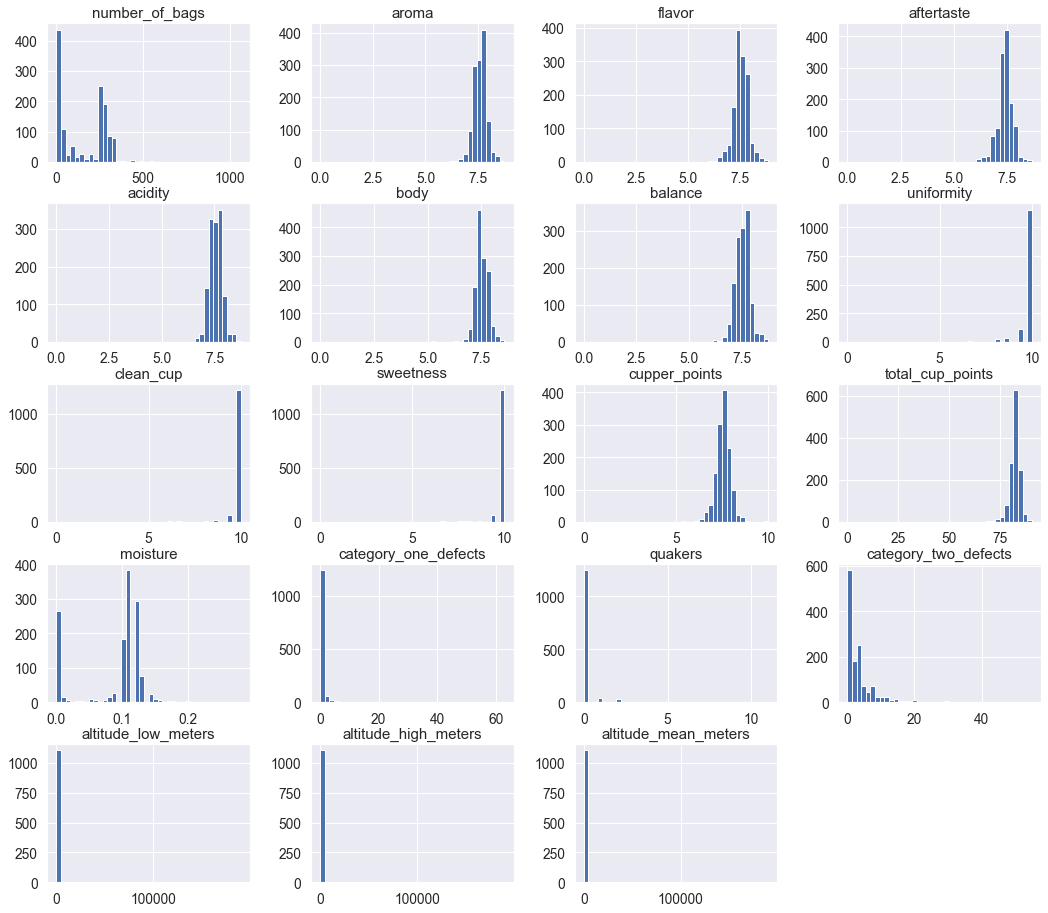

In [13]:
fig, ax = plt.subplots()
fig.tight_layout(pad=-20.)
df.hist(bins=40, ax=ax)
plt.show()

One may observe that:
- the order of magnitude can drasticaly change between different features, which would require a sclaing during the ML preprocessing
- different data distributions, such as normal (flavor, aftertaste, etc.) or skewed (category_two_defects)

In [14]:
df_num = df.select_dtypes(include=np.number).copy()
df_corr = df_num.corr()
df_corr

,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
number_of_bags,1.000000,-0.007040,0.002094,0.000473,0.029384,0.032897,0.032402,0.025492,0.030733,0.002071,-0.006287,0.020226,-0.053701,-0.079895,0.134575,-0.001113,-0.025910,-0.026154,-0.026033
aroma,-0.007040,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493,0.687288,0.791627,-0.134127,-0.096352,0.009058,-0.149024,-0.015680,-0.014786,-0.015234
flavor,0.002094,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065,0.793197,0.874279,-0.145201,-0.088792,0.005135,-0.191956,-0.011503,-0.010250,-0.010877
aftertaste,0.000473,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409,0.785123,0.860656,-0.180510,-0.104721,0.001044,-0.210016,-0.022862,-0.021363,-0.022114
acidity,0.029384,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854,0.698151,0.797024,-0.129079,-0.084269,-0.013714,-0.136814,0.001188,0.002427,0.001807
body,0.032897,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342,0.633208,0.757165,-0.147651,-0.044519,-0.004197,-0.085386,-0.013602,-0.011983,-0.012793
balance,0.032402,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272,0.721132,0.828502,-0.199843,-0.082406,0.007715,-0.171100,-0.013014,-0.011128,-0.012072
uniformity,0.025492,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083,0.359620,0.656454,0.013792,-0.105890,0.027441,-0.145833,-0.010379,-0.009632,-0.010006
clean_cup,0.030733,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644,0.356995,0.658859,-0.014916,-0.115594,0.025374,-0.232739,-0.004343,-0.004269,-0.004306
sweetness,0.002071,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000,0.216273,0.554029,0.072699,-0.150810,0.008666,-0.024998,-0.011338,-0.010797,-0.011068


<Axes: >

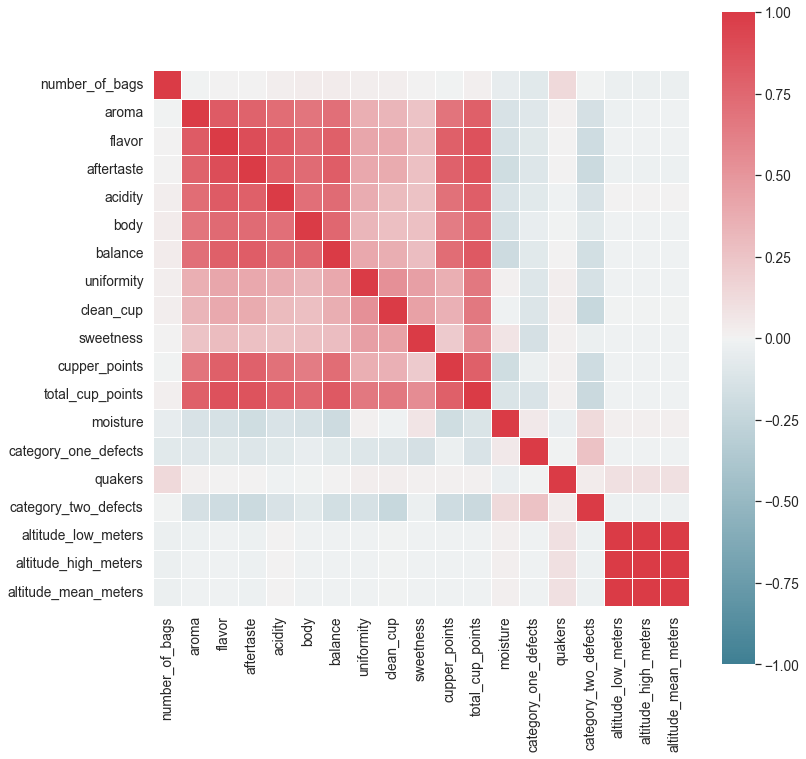

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, 
            cmap=cmap, 
            vmin=-1., vmax=1., 
            square=True, 
            linewidths=.5)

Here, the final coffee quality is described by the <code>total_cup_points</code> feature. The analysis of the correlation matrix shows that only some numerical features would impact it: <code>aroma</code>, <code>flavor</code>, <code>aftertaste</code>, <code>acidity</code>, <code>body</code>, <code>balance</code>, <code>uniformity</code>, <code>clean_cup</code> and <code>sweetness</code>.

In [16]:
df[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'total_cup_points']].isnull().sum()

aroma               0
flavor              0
aftertaste          0
acidity             0
body                0
balance             0
uniformity          0
clean_cup           0
sweetness           0
total_cup_points    0
dtype: int64

aroma         0.791627
flavor        0.874279
aftertaste    0.860656
acidity       0.797024
body          0.757165
balance       0.828502
uniformity    0.656454
clean_cup     0.658859
sweetness     0.554029
dtype: float64


<Axes: title={'center': 'Correlation with Coffee Quality'}>

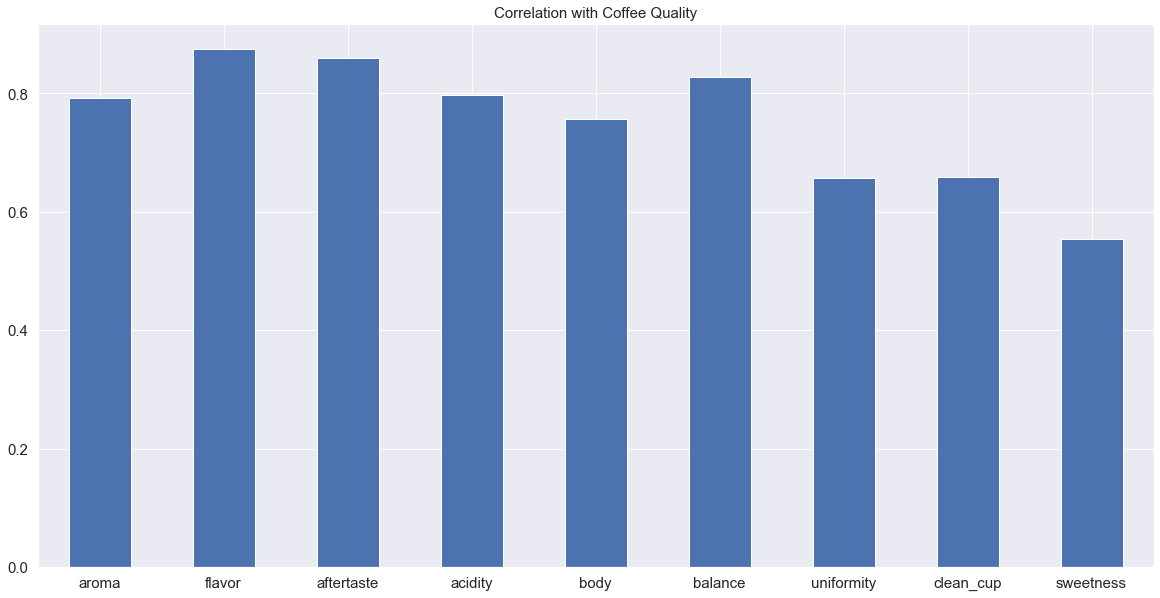

In [17]:
df_num_features = df[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']]
df_corr_num_feat = df_num_features.corrwith(df.total_cup_points)
print(df_corr_num_feat)
df_corr_num_feat.plot.bar(figsize = (20, 10), 
                          title = "Correlation with Coffee Quality", 
                          fontsize = 15,rot = 0, grid = True)

Let's quickly dissect the categorical features.

In [18]:
df_cat = df.select_dtypes(include=object).copy()
df_cat.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date',
       'owner_1', 'variety', 'processing_method', 'color', 'expiration',
       'certification_body', 'certification_address', 'certification_contact',
       'unit_of_measurement'],
      dtype='object')

In [19]:
for col in df_cat.columns.to_list():
    cat_col = df_cat[col]
    print(f'{col:22s}: {len(cat_col.unique()):4d} unique values - null: {cat_col.isnull().sum():4d} ({cat_col.isnull().sum()/cat_col.shape[0]*100:5.2f} %) - 1st value: {cat_col.iat[0]}')

species               :    2 unique values - null:    0 ( 0.00 %) - 1st value: Arabica
owner                 :  316 unique values - null:    7 ( 0.52 %) - 1st value: metad plc
country_of_origin     :   37 unique values - null:    1 ( 0.07 %) - 1st value: Ethiopia
farm_name             :  572 unique values - null:  359 (26.81 %) - 1st value: metad plc
lot_number            :  228 unique values - null: 1063 (79.39 %) - 1st value: nan
mill                  :  460 unique values - null:  318 (23.75 %) - 1st value: metad plc
ico_number            :  847 unique values - null:  159 (11.87 %) - 1st value: 2014/2015
company               :  282 unique values - null:  209 (15.61 %) - 1st value: metad agricultural developmet plc
altitude              :  397 unique values - null:  226 (16.88 %) - 1st value: 1950-2200
region                :  357 unique values - null:   59 ( 4.41 %) - 1st value: guji-hambela
producer              :  693 unique values - null:  232 (17.33 %) - 1st value: METAD PLC
bag

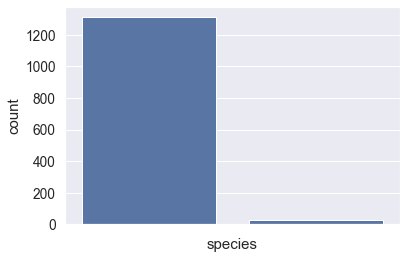

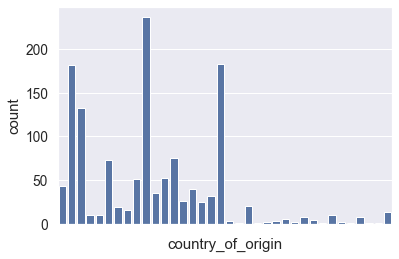

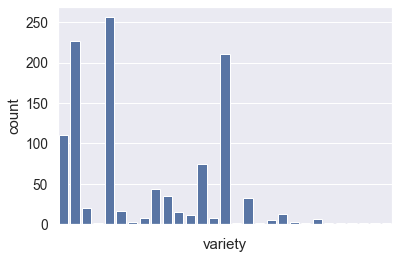

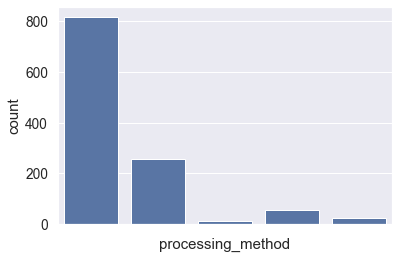

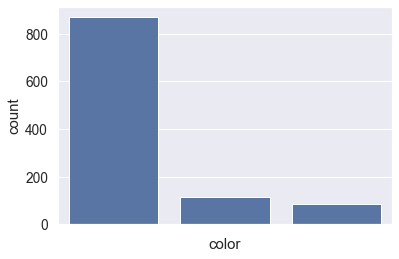

In [20]:
cat_feat = ['species', 'country_of_origin', 'variety', 'processing_method', 'color']

for f, feat in enumerate(cat_feat):
    ax = sns.countplot(data=df, x=feat)
    ax.set_xticklabels([])
    plt.show()

About half of categorical columns have null values, near 20% for these cases. Also, categorical features appear imbalanced and sometimes with too much different values, being unusable for extracting trends.